<a href="https://colab.research.google.com/github/rohandawar/-daysforcoding/blob/main/IntelImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libs
import pandas as pd
import numpy as np

# PLotting
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

# PIL
from PIL import Image

#Keras
from keras.preprocessing import image
from keras.utils import img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation,LeakyReLU
from tensorflow.keras.layers import BatchNormalization

#Random
import random

# OS
import os
from os import listdir

# Google
from google.colab import drive

In [2]:
#Mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Located search the folder for the dataset
! ls /content/drive/MyDrive/DataSets/Intel_Image_Dataset/Intel_Image_Dataset

buildings  forest  glacier  mountain  sea  street


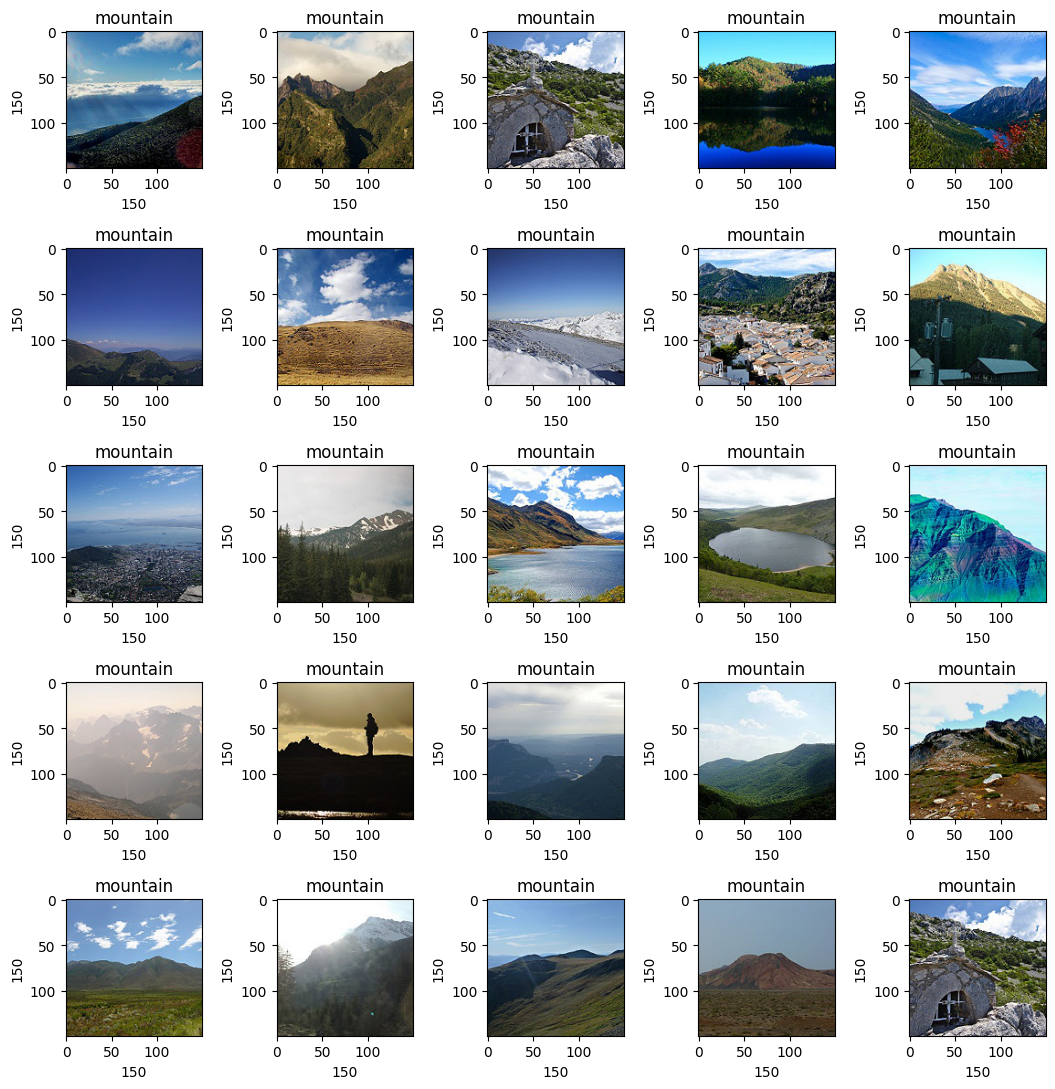

In [4]:
# plot the data
path = '/content/drive/MyDrive/DataSets/Intel_Image_Dataset/Intel_Image_Dataset/mountain'
plt.figure(figsize=(11,11))
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.tight_layout()
  rand_img = imread(path + '/' +random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.title('mountain')
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [5]:
# Set the Image path
dir =  '/content/drive/MyDrive/DataSets/Intel_Image_Dataset/Intel_Image_Dataset/'
root_dir = listdir(dir)
image_list, label_list = [], []

In [6]:
for directory in root_dir:
  for files in listdir(f'{dir}/{directory}'):
    image_path = f'{dir}/{directory}/{files}'
    image = Image.open(image_path)
    image = image.resize((150,150))
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)


In [7]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
dtype: int64

In [9]:
# Visualize the number of Classes count
num_classes = len(label_counts)
num_classes

6

In [10]:
# Checking the shape of data 
np.array(image_list).shape

(3000, 150, 150, 3)

In [11]:
# Checking the y data shape
label_list = np.array(label_list)
label_list.shape

(3000,)

In [13]:
# Train, Test split
x_train,x_test,y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [14]:
# Normalize & reshape data
x_train = np.array(x_train,dtype=np.float16)/225.0
x_test = np.array(x_test,dtype=np.float16)/225.0
x_train = x_train.reshape(-1,150,150,3)
x_test = x_test.reshape(-1,150,150,3)